# Random Forest 

### Ensembles
A widely used and effective method in machine learning involves creating learning models known as ensembles. An ensemble **takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone.**

### Why are Ensembles Effective?
Different learning models, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because **each individual model might overfit to a different part of the data**. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. 

##### Random forests are an example of the ensemble idea applied to decision trees.

A random forest creates lots of individual decision trees on a training set (10s-100s). The idea is that each of the individual trees in a random forest should do reasonably well at predicting the target values in the training set but should also be constructed to be different in some way from the other trees in the forest. This difference is accomplished by introducing random variation into the process of building each decision tree. This is achieved in two ways. 
1. First, the data used to build each tree is selected randomly and 
2. Second, the features chosen in each split tests are also randomly selected. 

### Bootstrap Sampling
Each tree were built from a different random sample of the data called the bootstrap sample. If your training set has N instances or samples in total, a bootstrap sample of size N is created by just **repeatedly picking one of the N dataset rows at random with replacement**, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement. 

### Best Split
When building a decision tree for a random forest, the process is almost the same as for a standard decision tree but with one important difference. When picking the best split for a node, instead of finding the best split across all possible features, **a random subset of features is chosen and the best split is found within that smaller subset of features. The number of features in the subset that are randomly considered at each stage** is controlled by the max_features parameter. 

This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different.

##### The random forest model is quite sensitive to the max_features parameter. 
* `max_Features = 1`: the random forest is limited to performing a split on the single feature that was selected randomly instead of being able to take the best split over several variables. This means the trees in the forest will likely be very different from each other and possibly with many levels in order to produce a good fit to the data. 
* `Max_features is ~ the total number of features`: The trees in the forest will tend to be similar and probably will require fewer levels to fit the data using the most informative features.

### Predictions
Once a random forest model is trained, it predicts the target value for new instances by first making a prediction for every tree in the random forest. 
1. For **regression tasks** the overall prediction is then typically the mean of the individual tree predictions.
2. For **classification** the overall prediction is based on a weighted vote. Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across all the trees and the class with the highest probability is the final predicted class. 

## Preamble and Datasets

<IPython.core.display.Javascript object>


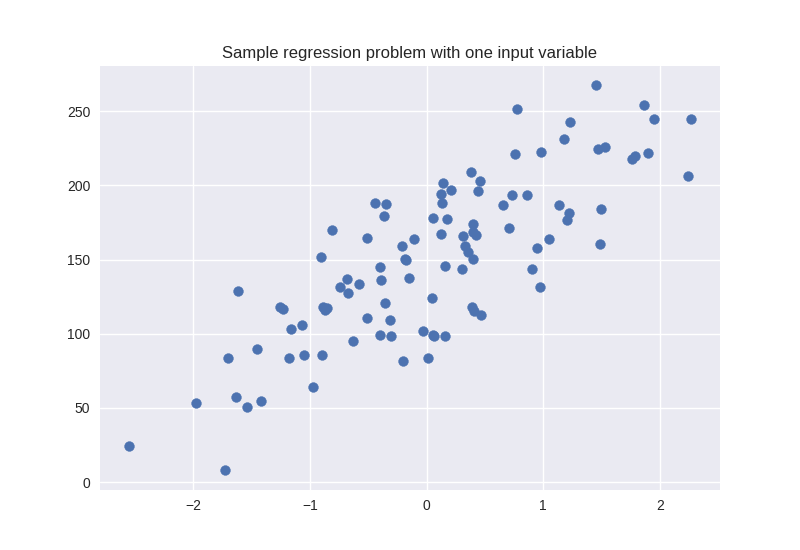

<IPython.core.display.Javascript object>


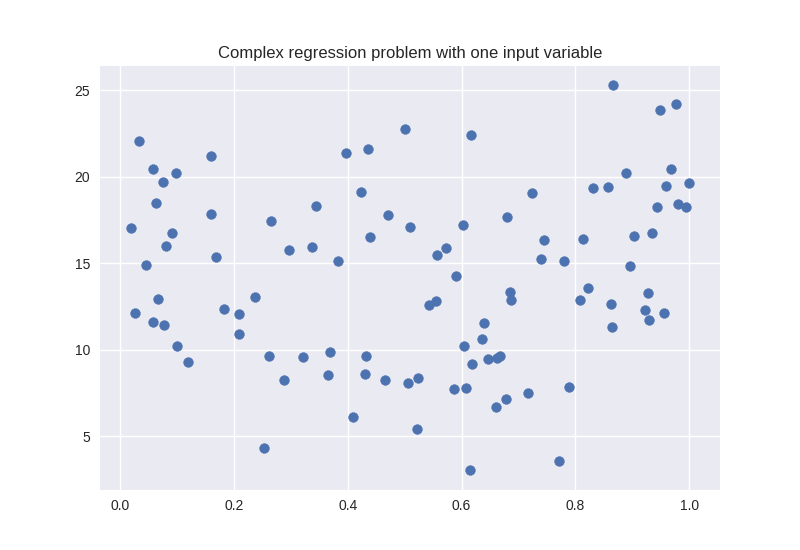

<IPython.core.display.Javascript object>


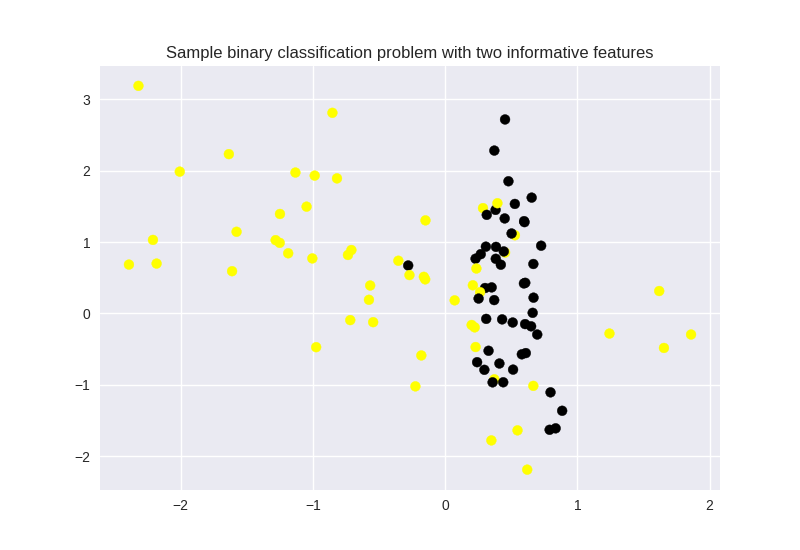

<IPython.core.display.Javascript object>


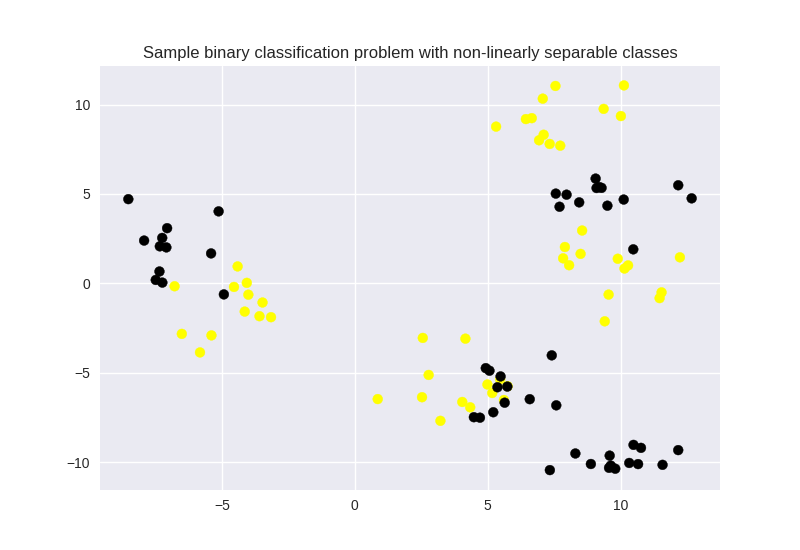

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset();

## Ensembles of Decision Trees

### Random forests

<IPython.core.display.Javascript object>


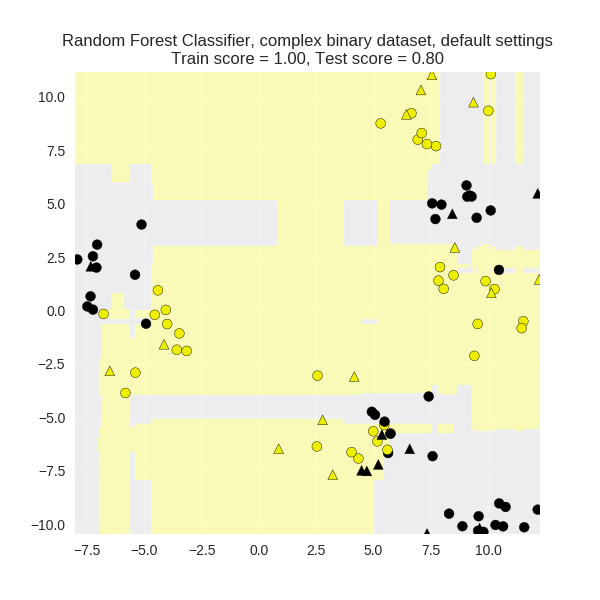

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

<IPython.core.display.Javascript object>


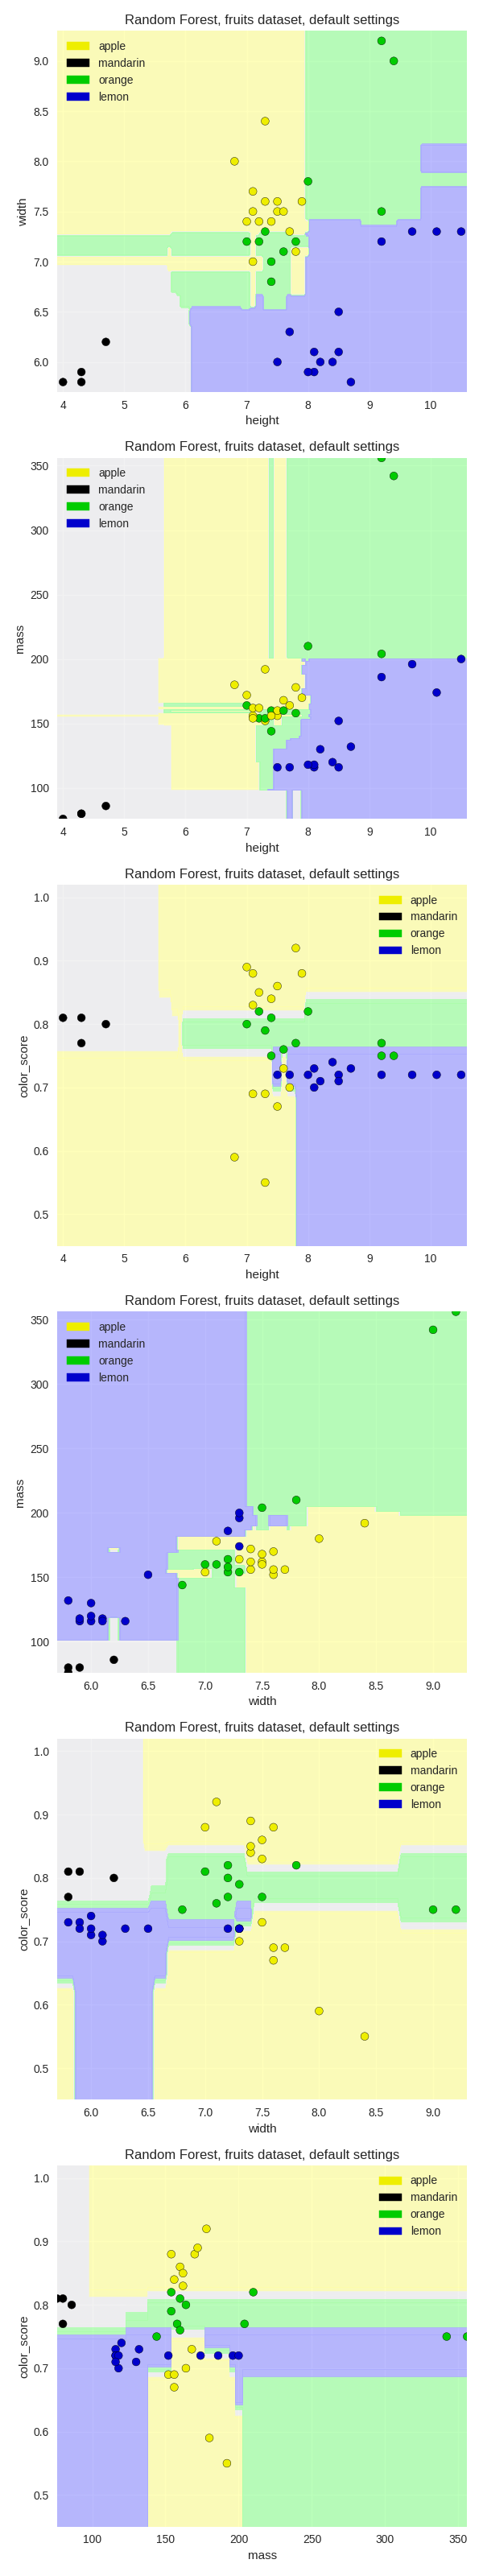

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [4]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


## PROS
On the positive side, 
* random forest are widely used because they're **very powerful**. They give excellent prediction performance on a wide variety of problems
* they **don't require careful scaling** of the feature data or extensive parameter tuning. 
* And even though building many different trees requires a corresponding increase in computation, building random forests is **easily parallelized across multiple CPU's**. 

## CONS
On the negative side,
* random forest models can be very **difficult to interpret** making it difficult to see the predictive structure of the features or to know why a particular prediction was made. 
* random forests are **not a good choice for tasks that have very high dimensional sparse features** like text classification.

## KEY PARAMETERS

### 1. `n_estimators`
* sets the number of trees to use. 
* default = 10.  
* `n_estimators` $ \uparrow \to $ ensembles average over more trees $ \to$ overfitting $ \downarrow$.
* `n_estimators` $ \uparrow \to $ computational cost of training $ \uparrow$.

### 2. `max_features`
* selects the number of features randomly. 
* default for classification = $ \sqrt{total\ number\ of\ features}$ 
* default for regression = $ log_2{(total\ number\ of\ features)}$
* `max_features` $ \downarrow \to$  overfitting $ \downarrow$

### 3. `max_depth`
* controls the depth of each tree in the ensemble. 
* default = `none` $ \to$ The nodes in a tree will continue to be split until all leaves contain the same class or have fewer samples than the minimum sample split parameter value (default = 2).

### 4. `n_jobs` 
* The number of jobs to run in parallel for both fit and predict
* default = 1 (single core processing)
* `n_jobs = -1` $\to$ (number of jobs = the number of cores in the system)

### 5. `random_state`
* static value $\to$ reproducible results.
